# Importing Libraries

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data for ML Project

In [2]:
df=pd.read_csv('organics.csv')

In [3]:
df.shape

(22223, 12)

In [4]:
df.head()

,Customer_Loyalty_ID,Gender,Geographic_Region,Loyalty_Status,Neigborhood_Cluster-55_Level,Neighborhood_Cluster-7_Level,Television_Region,Affluence_Grade,Age,Loyalty_Card_Tenure,Organics_Purchase_Indicator,Total_Spend
0,140,U,Midlands,Gold,16.0,C,Wales & West,10.0,76.0,4.0,0,16000
1,620,U,Midlands,Gold,35.0,D,Wales & West,4.0,49.0,5.0,0,6000
2,868,F,Midlands,Silver,27.0,D,Wales & West,5.0,70.0,8.0,1,2
3,1120,M,Midlands,Tin,51.0,F,Midlands,10.0,65.0,7.0,1,1
4,2313,F,Midlands,Tin,4.0,A,Midlands,11.0,68.0,8.0,0,1


In [5]:
df.dtypes

Customer_Loyalty_ID               int64
Gender                           object
Geographic_Region                object
Loyalty_Status                   object
Neigborhood_Cluster-55_Level    float64
Neighborhood_Cluster-7_Level     object
Television_Region                object
Affluence_Grade                 float64
Age                             float64
Loyalty_Card_Tenure             float64
Organics_Purchase_Indicator       int64
Total_Spend                       int64
dtype: object

# Setting Display options to ensure feature name visibility

In [6]:
pd.set_option('display.max_columns',None)

# Warning Suppression 

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Drop ID Feature from the dataset

In [8]:
df=df.drop(['Customer_Loyalty_ID'],axis=1)

# Defining Target and Independent Features

In [9]:
Y=df[['Organics_Purchase_Indicator']]
X=df.drop(['Organics_Purchase_Indicator'],axis=1)

In [10]:
Y['Organics_Purchase_Indicator'].value_counts()

0    16718
1     5505
Name: Organics_Purchase_Indicator, dtype: int64

In [11]:
Y.shape

(22223, 1)

# Get the Response Rate

In [12]:
Y.mean()

Organics_Purchase_Indicator    0.247716
dtype: float64

# Split features into Numerical and Categorical

In [13]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [14]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))

In [15]:
df_value_counts.columns=['feature_levels']
df_value_counts.head()

,feature_levels
Neigborhood_Cluster-55_Level,55
Affluence_Grade,33
Age,62
Loyalty_Card_Tenure,39
Total_Spend,2597


In [16]:
print ("The shape of numerical dataframe :",num.shape)
print ("The shape of categorical datafrme :",char.shape)

The shape of numerical dataframe : (22223, 5)
The shape of categorical datafrme : (22223, 5)


# Outlier Analysis of Numerical Features

In [17]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Neigborhood_Cluster-55_Level,Affluence_Grade,Age,Loyalty_Card_Tenure,Total_Spend
count,21549.000000,21138.000000,20715.000000,21942.000000,2.222300e+04
mean,27.193652,8.711893,53.797152,6.564670,1.418558e+05
std,15.751547,3.421125,13.206048,4.657113,5.611938e+05
min,1.000000,0.000000,18.000000,0.000000,1.000000e+00
1%,1.000000,2.000000,27.000000,1.000000,1.000000e+00
5%,4.000000,4.000000,32.000000,1.000000,1.000000e+00
10%,6.000000,5.000000,36.000000,2.000000,1.000000e+00
25%,14.000000,6.000000,44.000000,4.000000,1.000000e+00
50%,27.000000,8.000000,54.000000,5.000000,2.500000e+03
75%,38.000000,11.000000,64.000000,8.000000,8.000000e+03


# Capping and Flooring of outliers

In [18]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [19]:
num=num.apply(lambda x : outlier_cap(x))

In [20]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Neigborhood_Cluster-55_Level,Affluence_Grade,Age,Loyalty_Card_Tenure,Total_Spend
count,21549.000000,21138.000000,20715.000000,21942.000000,2.222300e+04
mean,27.187201,8.684833,53.820227,6.534591,1.273761e+05
std,15.740610,3.302267,13.125310,4.493736,4.039612e+05
min,1.000000,2.000000,27.000000,1.000000,1.000000e+00
1%,1.000000,2.000000,27.000000,1.000000,1.000000e+00
5%,4.000000,4.000000,32.000000,1.000000,1.000000e+00
10%,6.000000,5.000000,36.000000,2.000000,1.000000e+00
25%,14.000000,6.000000,44.000000,4.000000,1.000000e+00
50%,27.000000,8.000000,54.000000,5.000000,2.500000e+03
75%,38.000000,11.000000,64.000000,8.000000,8.000000e+03


# Missing Value Handling - Numerical Features 

In [21]:
num.isnull().mean()

Neigborhood_Cluster-55_Level    0.030329
Affluence_Grade                 0.048823
Age                             0.067858
Loyalty_Card_Tenure             0.012645
Total_Spend                     0.000000
dtype: float64

# Missing Value Handling - Numerical Features (Imputation with Mean)

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
num_1=pd.DataFrame(imputer.fit_transform(num),index=num.index,columns=num.columns)

In [23]:
num_1.isnull().mean()

Neigborhood_Cluster-55_Level    0.0
Affluence_Grade                 0.0
Age                             0.0
Loyalty_Card_Tenure             0.0
Total_Spend                     0.0
dtype: float64

# Missing Value Handling - Categorical Features (Remove >25% Missing Rows)

In [24]:
char.isnull().mean()

Gender                          0.113036
Geographic_Region               0.020924
Loyalty_Status                  0.000000
Neighborhood_Cluster-7_Level    0.030329
Television_Region               0.020924
dtype: float64

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
char_1=pd.DataFrame(imputer.fit_transform(char),index=char.index,columns=char.columns)

In [26]:
char_1.isnull().mean()

Gender                          0.0
Geographic_Region               0.0
Loyalty_Status                  0.0
Neighborhood_Cluster-7_Level    0.0
Television_Region               0.0
dtype: float64

# Feature Selection - Numerical Features 

# Part 1 : Remove Features with 0 Variance

In [27]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num_1)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_2 = num_1.iloc[:,cols]

In [28]:
num_2.iloc[0]

Neigborhood_Cluster-55_Level       16.0
Affluence_Grade                    10.0
Age                                76.0
Loyalty_Card_Tenure                 4.0
Total_Spend                     16000.0
Name: 0, dtype: float64

# Part 2 - Bi Variate Analysis (Feature Discretization)

In [29]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_2),index=num_2.index, columns=num_2.columns).add_suffix('_Rank')
num_binned.head()

,Neigborhood_Cluster-55_Level_Rank,Affluence_Grade_Rank,Age_Rank,Loyalty_Card_Tenure_Rank,Total_Spend_Rank
0,2.0,7.0,9.0,2.0,6.0
1,7.0,0.0,3.0,3.0,5.0
2,5.0,1.0,8.0,5.0,1.0
3,9.0,7.0,7.0,4.0,0.0
4,0.0,8.0,8.0,5.0,0.0


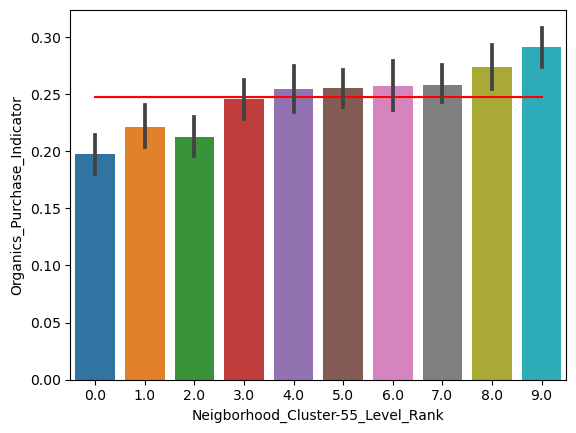

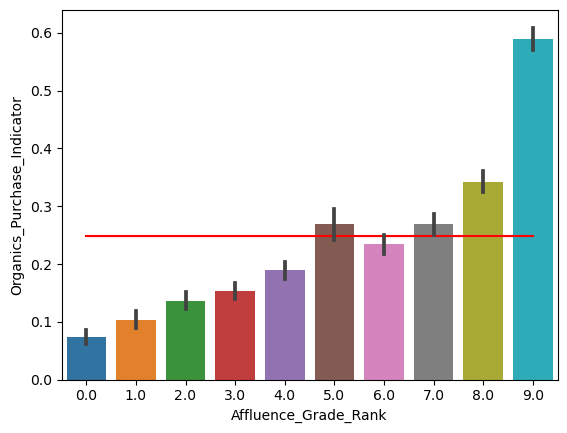

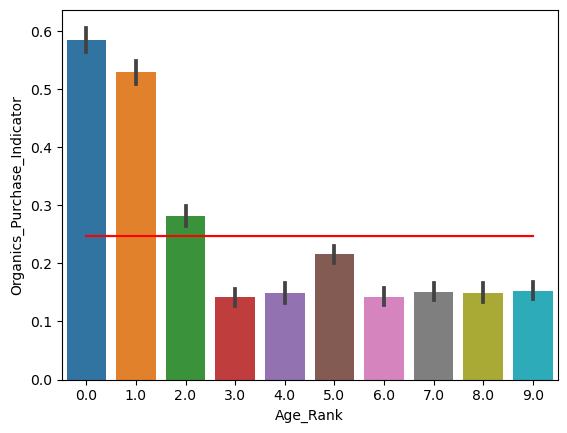

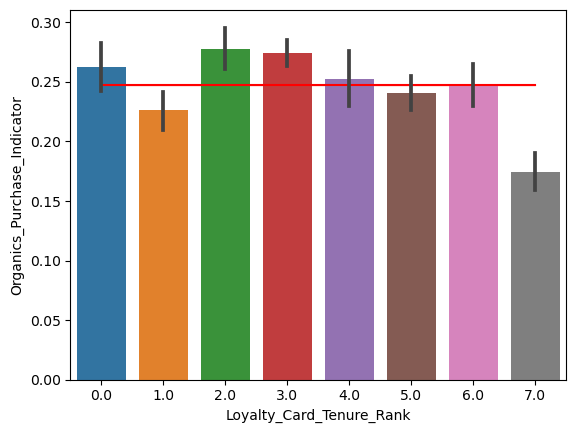

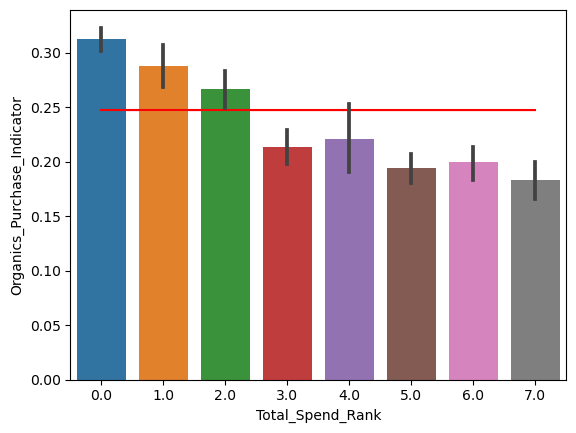

In [30]:
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['Organics_Purchase_Indicator'].mean(),data=X_bin_combined,color='red')
    sns.barplot(x=col, y='Organics_Purchase_Indicator',data=X_bin_combined, estimator=mean )
plt.show()

# Feature Engineering 

In [31]:
# Joining the Affluence_Grade and the Ranked Version of Affluence Grade

test_df=pd.concat([num_2[['Affluence_Grade']],X_bin_combined[['Affluence_Grade_Rank']],Y],axis=1,join="inner")

In [32]:
# Discovering Thresholds Values corresponding to Rank 9

test_df.groupby('Affluence_Grade_Rank')['Affluence_Grade'].agg(['min','max'])

,min,max
Affluence_Grade_Rank,,
0.0,2.000000,4.000000
1.0,5.000000,5.000000
2.0,6.000000,6.000000
3.0,7.000000,7.000000
4.0,8.000000,8.000000
5.0,8.684833,8.684833
6.0,9.000000,9.000000
7.0,10.000000,10.000000
8.0,11.000000,12.000000


In [33]:
# Building an Indicator Feature and test the discrimination of Event Rates

test_df['High_Affluence_Ind']=np.where(test_df['Affluence_Grade']>=13,1,0)
test_df.groupby('High_Affluence_Ind')['Organics_Purchase_Indicator'].agg(['mean'])

,mean
High_Affluence_Ind,
0,0.202608
1,0.589803


In [34]:
# Building the new indicator feature in our dataframe and drop the parent feature

num_2['High_Affluence_Ind']=np.where(num_2['Affluence_Grade']>=13,1,0)
num_2=num_2.drop(['Affluence_Grade'],axis=1)

# Part 3 - Select K Best

In [35]:
# We shall keep all (after dropping the Affluence_Grade) numerical features and therefore omit this step

In [36]:
select_features_df_num=num_2

# Feature Selection - Categorical Features 

In [37]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
char_unique_levels=pd.DataFrame(char.apply(lambda x : unique_levels(x)))
char_unique_levels

,0
Gender,3
Geographic_Region,5
Loyalty_Status,4
Neighborhood_Cluster-7_Level,7
Television_Region,13


# Part 1 - Bi Variate Analysis

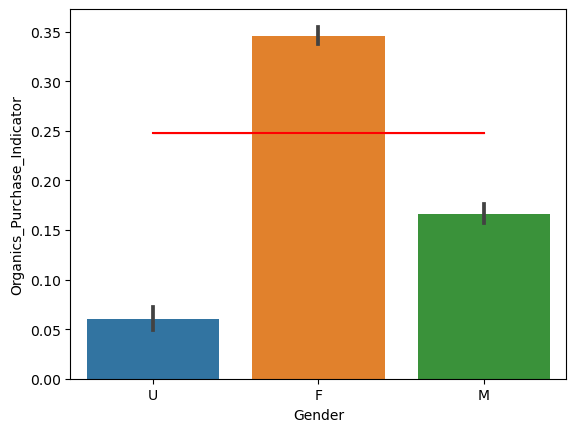

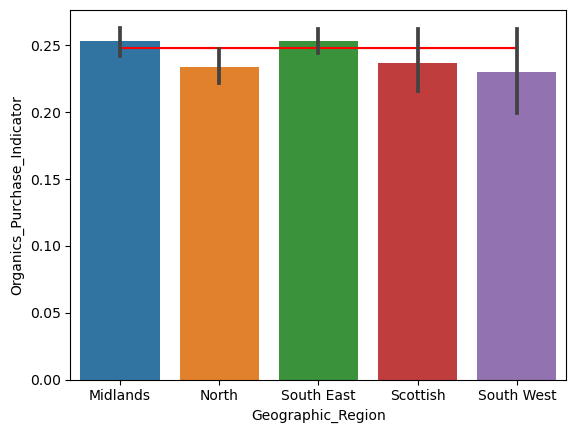

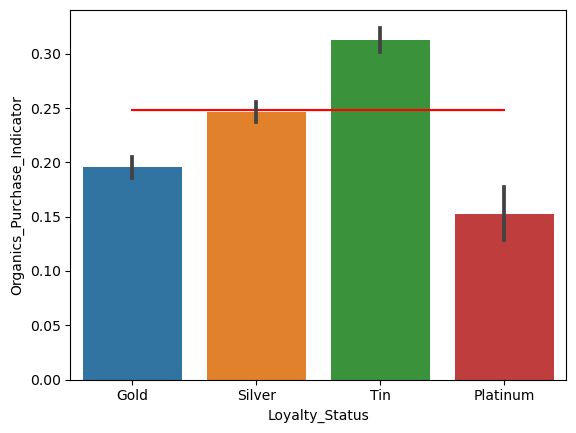

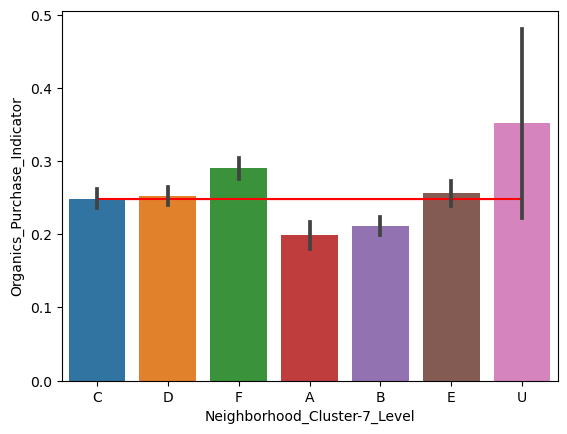

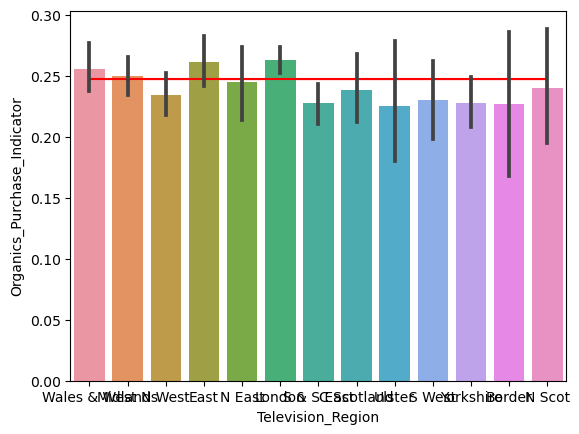

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['Organics_Purchase_Indicator'].mean(),data=X_char_merged,color='red')
    sns.barplot(x=col, y='Organics_Purchase_Indicator',data=X_char_merged, estimator=mean )
plt.show()

In [39]:
char_droplist=['Geographic_Region','Television_Region']
char_1=char_1.drop(char_droplist,axis=1)

In [40]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char_1, drop_first = True)
X_char_dum.shape

(22223, 11)

# Part 2 - Select K Best

In [41]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=9)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [42]:
select_features_df_char.head()

,Gender_M,Gender_U,Loyalty_Status_Platinum,Loyalty_Status_Tin,Neighborhood_Cluster-7_Level_B,Neighborhood_Cluster-7_Level_C,Neighborhood_Cluster-7_Level_E,Neighborhood_Cluster-7_Level_F,Neighborhood_Cluster-7_Level_U
0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0


# Creating the Master Feature Set for Model Development

In [43]:
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")

# Train Test Split

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=42)

In [45]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (15556, 14)
Shape of Testing Data (6667, 14)
Response Rate in Training Data Organics_Purchase_Indicator    0.247686
dtype: float64
Response Rate in Testing Data Organics_Purchase_Indicator    0.247788
dtype: float64


# Building Decision Tree Model

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=42)

# Grid Search for Model Optimization

In [47]:
# Min_Samples_Split starting from 5% of training base
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [750, 1000, 1250, 1500] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

/Users/shashi/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/shashi/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/shashi/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_split': 1000}


In [48]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=5,min_samples_split=1000)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=1000, random_state=0)

# Building Random Forest Model

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=5,min_samples_split=1000)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=1000, random_state=0)

# Building Gradient Boosting Model

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=150)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=6, min_samples_split=150,
                           random_state=0)

# Model Evaluation

In [51]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [52]:
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)

In [53]:
print("Accuracy from Decision Tree Model :",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision from Decision Tree Model :",metrics.precision_score(y_test,y_pred_tree))
print("Recall from Decision Tree Model :",metrics.recall_score(y_test,y_pred_tree))
print("f1_score from Decision Tree Model :",metrics.f1_score(y_test,y_pred_tree))
print("Area under ROC Curve from Decision Tree Model :",metrics.roc_auc_score(y_test,y_pred_tree))
print("Gini from the Decision Tree Model :",2*metrics.roc_auc_score(y_test,y_pred_tree)-1)

Accuracy from Decision Tree Model : 0.7996100194990251
Precision from Decision Tree Model : 0.6736263736263737
Recall from Decision Tree Model : 0.3710653753026634
f1_score from Decision Tree Model : 0.4785323965651835
Area under ROC Curve from Decision Tree Model : 0.6559215211508331
Gini from the Decision Tree Model : 0.31184304230166626


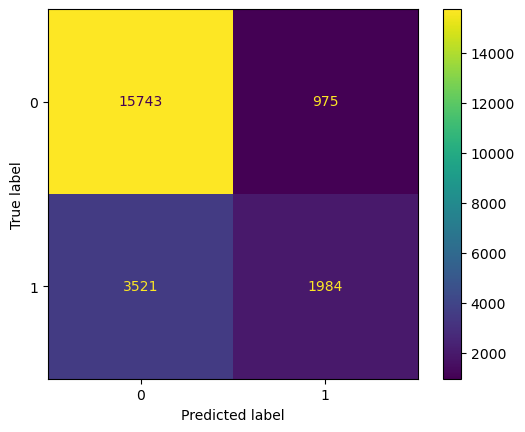

In [54]:
metrics.plot_confusion_matrix(dtree,X_all,Y);

In [55]:
print("Accuracy from Random Forest Model :",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision from Random Forest Model :",metrics.precision_score(y_test,y_pred_rf))
print("Recall from Random Forest Model :",metrics.recall_score(y_test,y_pred_rf))
print("f1_score from Random Forest Model :",metrics.f1_score(y_test,y_pred_rf))
print("Area under ROC Curve from Random Forest Model :",metrics.roc_auc_score(y_test,y_pred_rf))
print("Gini from the Random Forest Model :",2*metrics.roc_auc_score(y_test,y_pred_rf)-1)

Accuracy from Random Forest Model : 0.783860806959652
Precision from Random Forest Model : 0.872791519434629
Recall from Random Forest Model : 0.14951573849878935
f1_score from Random Forest Model : 0.2552971576227391
Area under ROC Curve from Random Forest Model : 0.5711686369463039
Gini from the Random Forest Model : 0.14233727389260786


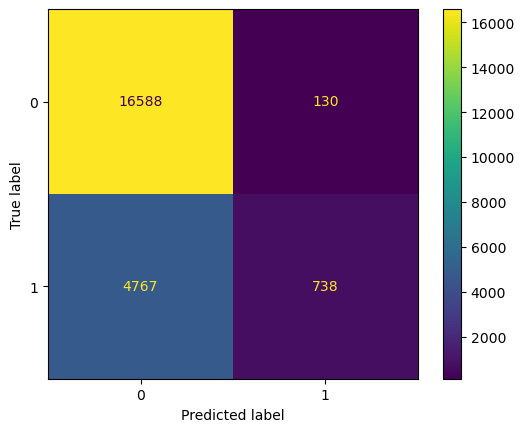

In [56]:
metrics.plot_confusion_matrix(rf,X_all,Y);

In [57]:
print("Accuracy from GBM Model :",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision from GBM Model :",metrics.precision_score(y_test,y_pred_gbm))
print("Recall from GBM Model :",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score from GBM Model :",metrics.f1_score(y_test,y_pred_gbm))
print("Area under ROC Curve from GBM Model :",metrics.roc_auc_score(y_test,y_pred_gbm))
print("Gini from the GBM Model :",2*metrics.roc_auc_score(y_test,y_pred_gbm)-1)

Accuracy from GBM Model : 0.7970601469926504
Precision from GBM Model : 0.6380424746075716
Recall from GBM Model : 0.41828087167070216
f1_score from GBM Model : 0.5053016453382084
Area under ROC Curve from GBM Model : 0.6700576840905853
Gini from the GBM Model : 0.3401153681811706


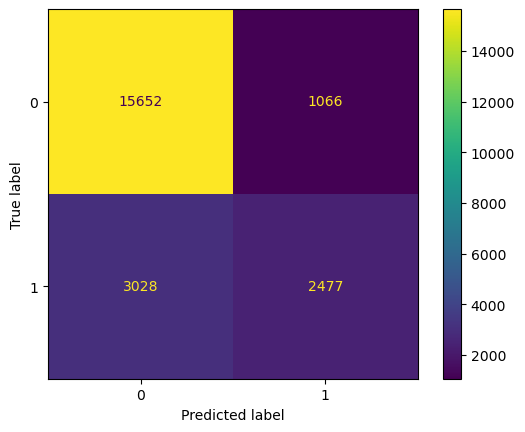

In [58]:
metrics.plot_confusion_matrix(gbm,X_all,Y);

# Extracting Feature Importance from the best model

In [59]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances.shape

(14, 1)

# Extracting the Top 10 Important Model Features

In [60]:
feature_importances.iloc[0:10]

,importance
Age,0.532874
High_Affluence_Ind,0.188080
Total_Spend,0.087271
Gender_U,0.050103
Neigborhood_Cluster-55_Level,0.049449
Gender_M,0.042789
Loyalty_Card_Tenure,0.039016
Neighborhood_Cluster-7_Level_B,0.002620
Neighborhood_Cluster-7_Level_E,0.001994
Neighborhood_Cluster-7_Level_U,0.001564


# Plotting the top 10 feature importances in a Horizontal Bar Plot

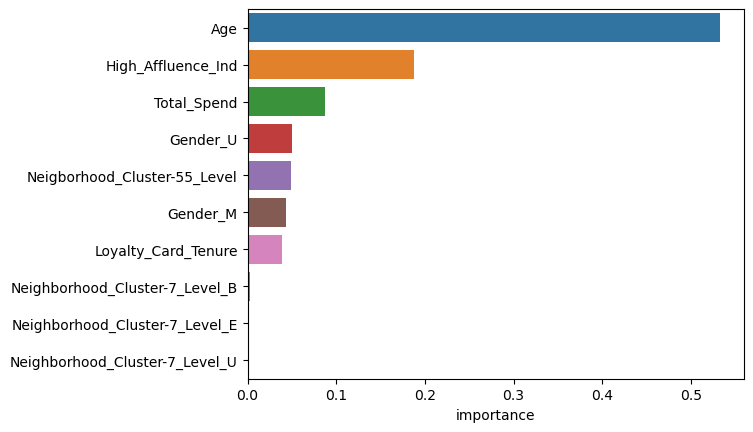

In [61]:
ax=sns.barplot(x='importance',y=feature_importances.iloc[0:10].index,data=feature_importances.iloc[0:10])

# Probability Decile Analysis and Gains Chart / Lorenz Curve

# Step 1 : Getting the Model Probabilities

In [62]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df['pred_prob']=pd.DataFrame(y_pred_prob)

# Step 2 : Create Deciles based on the Model Probabilities

In [63]:
df['P_Rank_gbm']=pd.qcut(df['pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1
df[['pred_prob','P_Rank_gbm']].tail()

,pred_prob,P_Rank_gbm
22218,0.574265,9
22219,0.087731,2
22220,0.152239,5
22221,0.185604,7
22222,0.183436,7


# Step 3 : Summarize the data at Decile Level for Analysis

In [64]:
rank_df=df.groupby('P_Rank_gbm')['Organics_Purchase_Indicator'].agg(['count','mean']).sort_values(by='P_Rank_gbm',ascending=False)
rank_df.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df

,count,Actual_event_rate
P_Rank_gbm,,
10,2223,0.778677
9,2222,0.518002
8,2222,0.363186
7,2222,0.242124
6,2222,0.176418
5,2223,0.123707
4,2222,0.113411
3,2222,0.085959
2,2222,0.057156


# Step 4 - Event Capture Analysis across Probability Deciles

In [65]:
rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
rank_df['cum_events']=rank_df['N_events'].cumsum()
rank_df['event_cap']=rank_df['N_events']/max(rank_df['N_events'].cumsum())
rank_df['cum_event_cap']=rank_df['event_cap'].cumsum()
rank_df

,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap
P_Rank_gbm,,,,,,
10,2223,0.778677,1731.0,1731.0,0.314441,0.314441
9,2222,0.518002,1151.0,2882.0,0.209083,0.523524
8,2222,0.363186,807.0,3689.0,0.146594,0.670118
7,2222,0.242124,538.0,4227.0,0.097729,0.767847
6,2222,0.176418,392.0,4619.0,0.071208,0.839055
5,2223,0.123707,275.0,4894.0,0.049955,0.889010
4,2222,0.113411,252.0,5146.0,0.045777,0.934787
3,2222,0.085959,191.0,5337.0,0.034696,0.969482
2,2222,0.057156,127.0,5464.0,0.023070,0.992552


# Step 5 - Non Event Capture Analysis across Probability Deciles

In [66]:
rank_df['N_non_events']=rank_df['count']-rank_df['N_events']
rank_df['cum_non_events']=rank_df['N_non_events'].cumsum()
rank_df['non_event_cap']=rank_df['N_non_events']/max(rank_df['N_non_events'].cumsum())
rank_df['cum_non_event_cap']=rank_df['non_event_cap'].cumsum()
rank_df

,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap
P_Rank_gbm,,,,,,,,,,
10,2223,0.778677,1731.0,1731.0,0.314441,0.314441,492.0,492.0,0.029429,0.029429
9,2222,0.518002,1151.0,2882.0,0.209083,0.523524,1071.0,1563.0,0.064063,0.093492
8,2222,0.363186,807.0,3689.0,0.146594,0.670118,1415.0,2978.0,0.084639,0.178131
7,2222,0.242124,538.0,4227.0,0.097729,0.767847,1684.0,4662.0,0.100730,0.278861
6,2222,0.176418,392.0,4619.0,0.071208,0.839055,1830.0,6492.0,0.109463,0.388324
5,2223,0.123707,275.0,4894.0,0.049955,0.889010,1948.0,8440.0,0.116521,0.504845
4,2222,0.113411,252.0,5146.0,0.045777,0.934787,1970.0,10410.0,0.117837,0.622682
3,2222,0.085959,191.0,5337.0,0.034696,0.969482,2031.0,12441.0,0.121486,0.744168
2,2222,0.057156,127.0,5464.0,0.023070,0.992552,2095.0,14536.0,0.125314,0.869482


# Step 6 - Compute KS Statistic and Lift over Baseline Event Rate

In [67]:
rank_df['KS']=round((rank_df['cum_event_cap']-rank_df['cum_non_event_cap']),4)
rank_df['Baseline_Event_Rate']=(max(rank_df['cum_events'])/max(rank_df['count'].cumsum()))
rank_df['Lift_over_Avg']=rank_df['Actual_event_rate']/rank_df['Baseline_Event_Rate']
rank_df

,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,Baseline_Event_Rate,Lift_over_Avg
P_Rank_gbm,,,,,,,,,,,,,
10,2223,0.778677,1731.0,1731.0,0.314441,0.314441,492.0,492.0,0.029429,0.029429,0.2850,0.247716,3.143424
9,2222,0.518002,1151.0,2882.0,0.209083,0.523524,1071.0,1563.0,0.064063,0.093492,0.4300,0.247716,2.091109
8,2222,0.363186,807.0,3689.0,0.146594,0.670118,1415.0,2978.0,0.084639,0.178131,0.4920,0.247716,1.466138
7,2222,0.242124,538.0,4227.0,0.097729,0.767847,1684.0,4662.0,0.100730,0.278861,0.4890,0.247716,0.977425
6,2222,0.176418,392.0,4619.0,0.071208,0.839055,1830.0,6492.0,0.109463,0.388324,0.4507,0.247716,0.712176
5,2223,0.123707,275.0,4894.0,0.049955,0.889010,1948.0,8440.0,0.116521,0.504845,0.3842,0.247716,0.499389
4,2222,0.113411,252.0,5146.0,0.045777,0.934787,1970.0,10410.0,0.117837,0.622682,0.3121,0.247716,0.457827
3,2222,0.085959,191.0,5337.0,0.034696,0.969482,2031.0,12441.0,0.121486,0.744168,0.2253,0.247716,0.347004
2,2222,0.057156,127.0,5464.0,0.023070,0.992552,2095.0,14536.0,0.125314,0.869482,0.1231,0.247716,0.230731


# Step 7 - Create Deciles (1-10) column to indicate the Decile number

In [68]:
rank_df=rank_df.reset_index()
rank_df['Decile']=rank_df.index+1
rank_df

,P_Rank_gbm,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,Baseline_Event_Rate,Lift_over_Avg,Decile
0,10,2223,0.778677,1731.0,1731.0,0.314441,0.314441,492.0,492.0,0.029429,0.029429,0.2850,0.247716,3.143424,1
1,9,2222,0.518002,1151.0,2882.0,0.209083,0.523524,1071.0,1563.0,0.064063,0.093492,0.4300,0.247716,2.091109,2
2,8,2222,0.363186,807.0,3689.0,0.146594,0.670118,1415.0,2978.0,0.084639,0.178131,0.4920,0.247716,1.466138,3
3,7,2222,0.242124,538.0,4227.0,0.097729,0.767847,1684.0,4662.0,0.100730,0.278861,0.4890,0.247716,0.977425,4
4,6,2222,0.176418,392.0,4619.0,0.071208,0.839055,1830.0,6492.0,0.109463,0.388324,0.4507,0.247716,0.712176,5
5,5,2223,0.123707,275.0,4894.0,0.049955,0.889010,1948.0,8440.0,0.116521,0.504845,0.3842,0.247716,0.499389,6
6,4,2222,0.113411,252.0,5146.0,0.045777,0.934787,1970.0,10410.0,0.117837,0.622682,0.3121,0.247716,0.457827,7
7,3,2222,0.085959,191.0,5337.0,0.034696,0.969482,2031.0,12441.0,0.121486,0.744168,0.2253,0.247716,0.347004,8
8,2,2222,0.057156,127.0,5464.0,0.023070,0.992552,2095.0,14536.0,0.125314,0.869482,0.1231,0.247716,0.230731,9
9,1,2223,0.018444,41.0,5505.0,0.007448,1.000000,2182.0,16718.0,0.130518,1.000000,0.0000,0.247716,0.074454,10


# Visualizing the performance of Model Probabilties across Deciles

# Step 8 - Create the Rank Ordering Chart

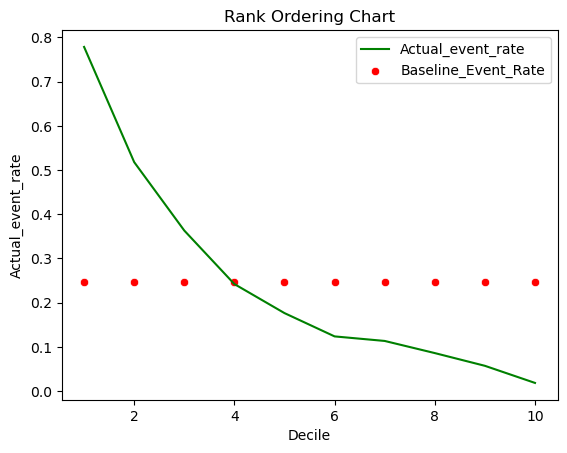

In [69]:
ax = sns.lineplot(x="Decile", y="Actual_event_rate", data=rank_df,color='green').set_title('Rank Ordering Chart')
ax = sns.scatterplot( x="Decile", y="Baseline_Event_Rate", data=rank_df,color='red')
ax.legend(['Actual_event_rate', 'Baseline_Event_Rate'])
plt.show()

# Step 9 - Create the Lift Chart

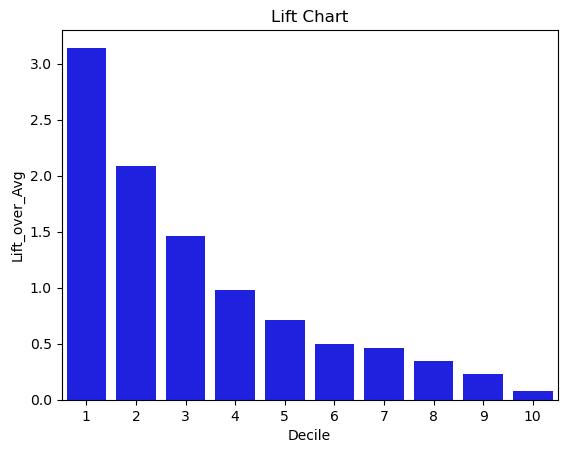

In [70]:
ax = sns.barplot( x="Decile", y="Lift_over_Avg", data=rank_df,color='blue').set_title('Lift Chart')

# Step 10 - Create the Gains Chart / Lorenz Curve

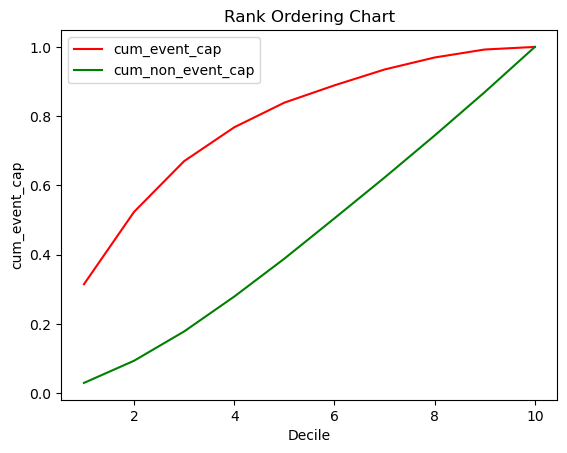

In [71]:
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=rank_df,color='red').set_title('Rank Ordering Chart')
ax = sns.lineplot( x="Decile", y="cum_non_event_cap", data=rank_df,color='green')
ax.legend(['cum_event_cap', 'cum_non_event_cap'])
plt.show()

# Is our Model able to Maximise Event/Non-Event Discrimination by the Top 3 deciles?

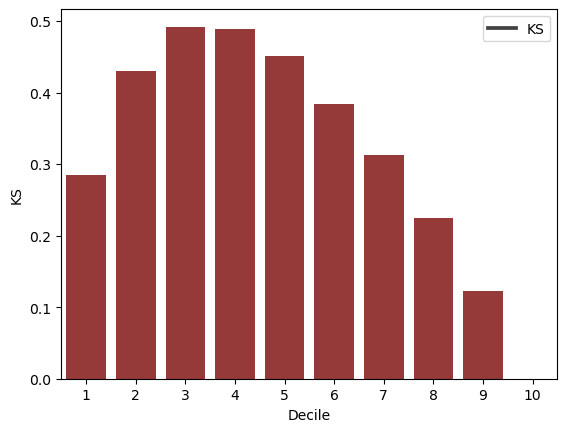

In [72]:
ax = sns.barplot( x="Decile", y="KS", data=rank_df,color='brown')
ax.legend(['KS'])
plt.show()

# Utlize APT framework to build a Machine Learning Driven Strategy

# A - Audience (Who do we target?)

In [73]:
df['Predicted_Resp_Rank']=np.where(df['P_Rank_gbm']<8,"Bottom7","Top3")
df['Predicted_Resp_Rank'].value_counts()

Bottom7    15556
Top3        6667
Name: Predicted_Resp_Rank, dtype: int64

In [74]:
df_top3=df.loc[df['Predicted_Resp_Rank']=="Top3",:]
df_top3.shape

(6667, 14)

# P - Prioritization (Based on Business Value and Customer Engagement)

In [75]:
df_top3['spend_level']=np.where(df_top3['Total_Spend']<=df_top3['Total_Spend'].quantile(0.80),"Low Spend","High Spend")
df_top3['spend_level'].value_counts()

Low Spend     5612
High Spend    1055
Name: spend_level, dtype: int64

In [76]:
df_top3['Affluence_level']=np.where(df_top3['Affluence_Grade']>=13,"High Affluence","Low Affluence")
df_top3['Affluence_level'].value_counts()

Low Affluence     4352
High Affluence    2315
Name: Affluence_level, dtype: int64

In [77]:
pd.crosstab(index=df_top3['spend_level'], columns=df_top3['Affluence_level'],values=df_top3['pred_prob'],aggfunc='mean')

Affluence_level,High Affluence,Low Affluence
spend_level,,
High Spend,0.543669,0.476642
Low Spend,0.645559,0.490339


In [78]:
pd.crosstab(index=df_top3['spend_level'], columns=df_top3['Affluence_level'],values=df_top3['pred_prob'],aggfunc='count')

Affluence_level,High Affluence,Low Affluence
spend_level,,
High Spend,482,573
Low Spend,1833,3779


In [79]:
df_priority_1=df_top3.loc[(df_top3['spend_level']=='Low Spend') & (df_top3['Affluence_level']=='High Affluence'),:]
df_priority_1.shape

(1833, 16)

In [80]:
df_priority_2=df_top3.loc[(df_top3['spend_level']=='High Spend') & (df_top3['Affluence_level']=='High Affluence'),:]
df_priority_2.shape

(482, 16)

In [81]:
df_priority_3=df_top3.loc[(df_top3['spend_level']=='Low Spend') & (df_top3['Affluence_level']=='Low Affluence'),:]
df_priority_3.shape

(3779, 16)

In [82]:
df_priority_4=df_top3.loc[(df_top3['spend_level']=='High Spend') & (df_top3['Affluence_level']=='Low Affluence'),:]
df_priority_4.shape

(573, 16)

# Project Report and Actionable Insights

# Objective of the Project
Predict Loyalty towards Organic Products  for enabling Supermarket to design the next Marketing Campaign

# Baseline Event Rate
The Response Rate from the data is 25%

# Algorithms Used :
In this project we have used Decision Trees, Random Forests and Gradient Boosting Algorithms

# Final Model Algorithm

Among the models that we tried building the GBM Algorithm performed the best in terms of F1_Score, Area under ROC Curve and Overall Model Gini

Therefore we have kept GBM as the final model algorithm

# Grid Search CV parameters
Maximum Depth of Tree - 5

Minimum Sample Size for Nodes to be Split - 1000 Observations

# Model Performance Measures

Accuracy - 0.80

Precision - 0.64

Recall - 0.42

F1 Score - 0.51

AUC - 0.67

Gini - 0.34          

# Model Probability Discrimination Measures
Steady Event Rate Rank Ordering (Yes/No) - Yes

Rank Ordering Reverals in Top 3 Deciles (Yes/No) - No

lift over  baseline event rate in the Top Decile - 3.14

Cumulative Event Capture in the Top 3 Deciles - 67%

Maximum KS Statistic Value - 0.49

Does KS Statistic Maximize within Top 3 Deciles (Yes/No) - Yes


# Top 10 drivers from the Model

Age

High_Affluence_Ind

Total_Spend

Gender_U

Neigborhood_Cluster-55_Level

Gender_M

Loyalty_Card_Tenure

Neighborhood_Cluster-7_Level_B

Neighborhood_Cluster-7_Level_E

Neighborhood_Cluster-7_Level_U


# Deploying the APT Strategy 
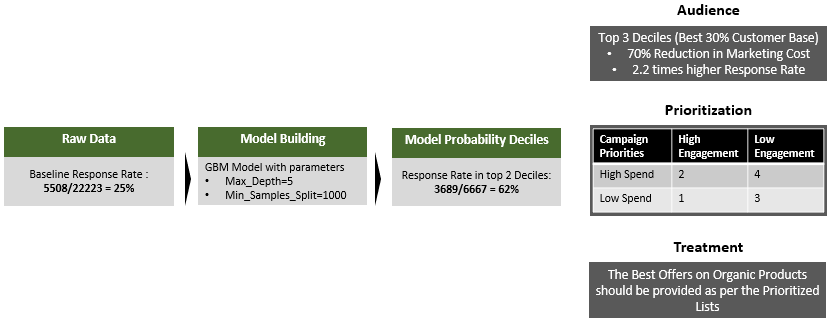
